In [30]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import seaborn as sns


df = pd.read_csv("D:/PYTHON/WS CUBE TECH/Datasets/spotify-2023.csv",encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [31]:
df["in_shazam_charts"] = df["in_shazam_charts"].str.replace(",", "").astype(float)

In [32]:
df["in_shazam_charts"].mean()
df["in_shazam_charts"] = df["in_shazam_charts"].fillna(60)

In [33]:
df["key"] = df["key"].fillna(method = "ffill")


C:\Users\Aman\AppData\Local\Temp\ipykernel_16196\2206001869.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["key"] = df["key"].fillna(method = "ffill")


In [34]:
df["streams"] = df["streams"].replace("BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3",np.nan)

In [41]:
df["streams"] = df["streams"].astype("Int64")
df["streams"].mean()
df["streams"] = df["streams"].fillna(513597931)



In [36]:
df["released_date"] = df["released_day"].astype(str)+"/"+df["released_month"].astype(str)+"/"+ df["released_year"].astype(str)
df["released_date"] = pd.to_datetime(df["released_date"])
df["month_name"] = df["released_date"].dt.strftime("%b")


C:\Users\Aman\AppData\Local\Temp\ipykernel_16196\406823957.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["released_date"] = pd.to_datetime(df["released_date"])


In [42]:
df["streams(Million)"] = (df["streams"] //1000000)
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,month_name,streams(Million)
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,50,38,80,0,0,9,7,2019-11-29,Nov,3703
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,83,93,65,58,0,9,8,2017-01-06,Jan,3562
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,50,45,41,75,0,11,3,2018-11-08,Nov,2887
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,82,54,59,69,0,18,10,2019-05-10,May,2864
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,76,91,50,54,0,7,5,2018-10-09,Oct,2808
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,77,36,63,1,0,36,5,2016-04-04,Apr,2713
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,59,48,76,4,0,10,5,2021-07-09,Jul,2665
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,77,74,78,4,0,23,11,2017-01-31,Jan,2594
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,75,64,52,41,0,11,3,2016-05-31,May,2591
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,68,49,59,16,0,13,28,2016-09-21,Sep,2565


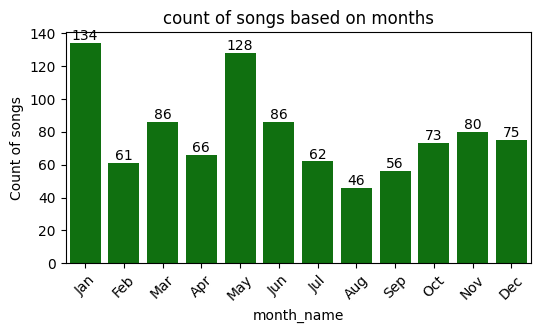

In [38]:
# In which month maximun songs released?

mp.figure(figsize = (6,3))
ax = sns.countplot(data = df, x = "month_name", order=("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"), color = "green")
ax.bar_label(ax.containers[0])
mp.xticks(rotation = 45)
mp.ylabel("Count of songs")
mp.title("count of songs based on months")
mp.show()

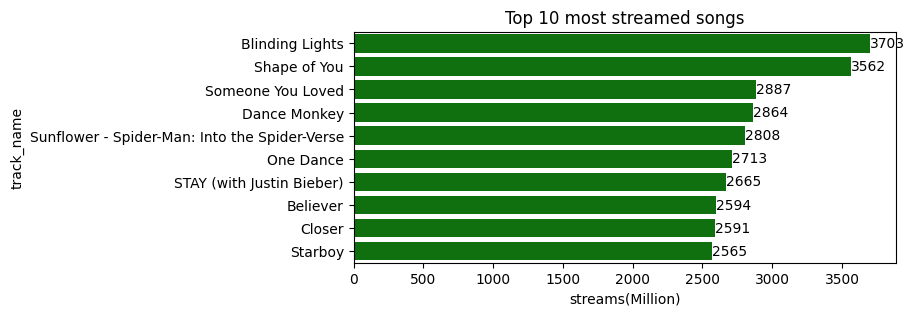

In [39]:
# What are the top 10 most streamed songs on Spotify in 2023?

df = df.sort_values(by = "streams", ascending = False)
top10songs = df.head(10)
top10songs
mp.figure(figsize = (7,3))
ax = sns.barplot(data = top10songs, y = "track_name", x = "streams(Million)", color = "green"  )
ax.bar_label(ax.containers[0],label_type="edge")
mp.title("Top 10 most streamed songs")
mp.show()


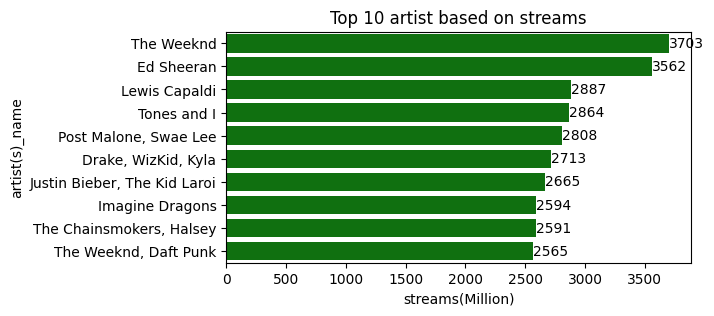

In [43]:
# Top 10 artist based on streams.
gb = df.groupby("artist(s)_name").agg({"streams(Million)":"max"})
a = gb.sort_values(by = "streams(Million)", ascending = False)
top_10artist = a.head(10)
top_10artist
mp.figure(figsize = (6,3))
ax = sns.barplot(data = top_10artist, y = "artist(s)_name", x= "streams(Million)", color = 'green')
ax.bar_label(ax.containers[0])
mp.title("Top 10 artist based on streams")
mp.show()

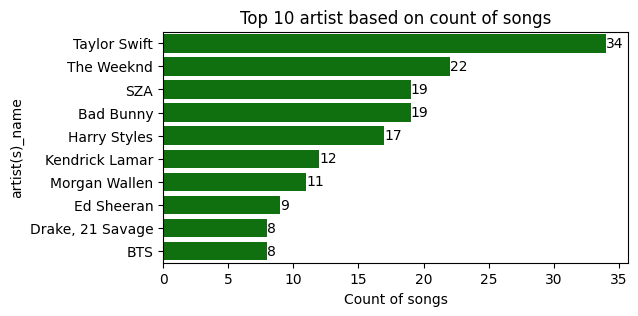

In [48]:
# Top 10 artist or group has the most songs in most streamed songs in 2023?

gb = df.groupby("artist(s)_name").agg({"track_name":"count"})
a = gb.sort_values(by= "track_name", ascending =False)
top10 = a.head(10)

mp.figure(figsize=(6,3))
ax = sns.barplot(data = top10, y ="artist(s)_name", x = "track_name", color = "green" )
ax.bar_label(ax.containers[0])
mp.xlabel("Count of songs")
mp.title("Top 10 artist based on count of songs")
mp.show()

In [52]:
# Which artist or group has the most songs in the top 50 most streamed songs in 2023?

top_50 = df.head(50)
gb = top_50.groupby("artist(s)_name").agg({"streams":"sum", "track_name": "count"})
gb.sort_values(by = "track_name", ascending = False)
gb.idxmax()

streams       Ed Sheeran
track_name    Ed Sheeran
dtype: object

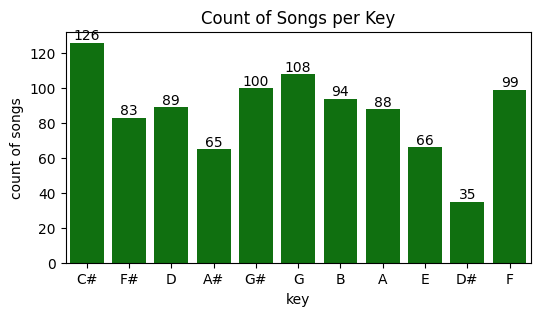

In [54]:
# Majorly used key in most streamed songs in 2023?

mp.figure(figsize=(6, 3))
ax = sns.countplot(x="key", data=df, color = "green")
ax.bar_label(ax.containers[0])
mp.ylabel("count of songs")
mp.title("Count of Songs per Key")
mp.show()

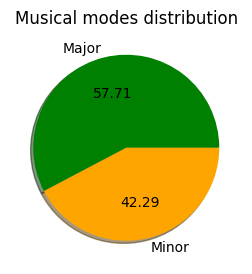

In [55]:
# Which musical modes appear more frequently among the top streamed songs in 2023?
gb= df.groupby("mode").agg({"track_name":"count"})
gb
mp.figure(figsize = (3,4))
mp.pie(gb["track_name"], labels = gb.index, autopct = "%1.2f", shadow = True, colors = ["green","orange"])
mp.title("Musical modes distribution")
mp.show()


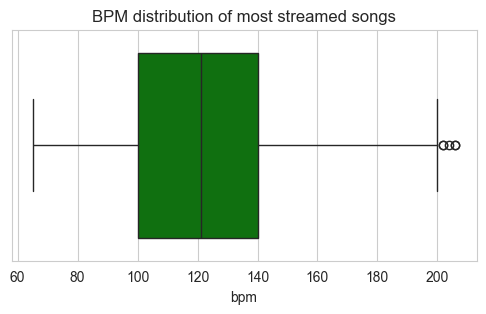

In [56]:
# What is the average tempo (BPM) of the most streamed songs in 2023? Are there any outliers?

df["bpm"].mean() #mean = 122.54
mp.figure(figsize= (6,3))
sns.set_style(style = "whitegrid")
ax = sns.boxplot(data = df, x = "bpm", color = "green")
mp.title("BPM distribution of most streamed songs")
mp.show()

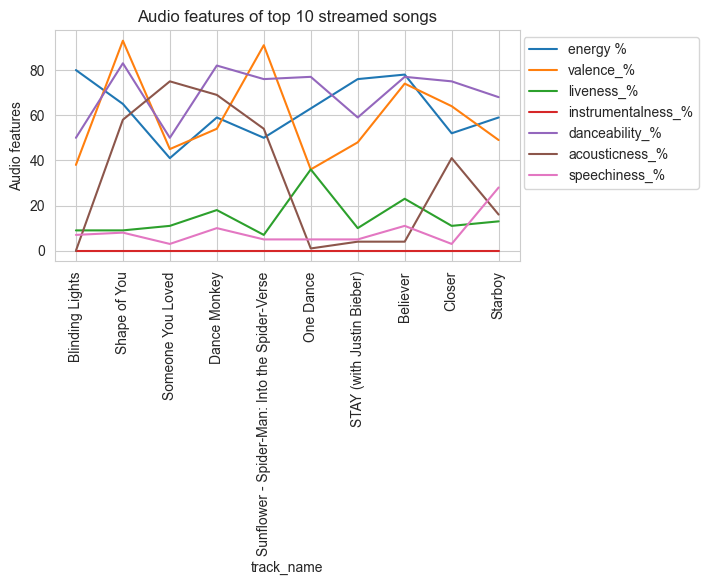

In [61]:
# Explore patterns in audio features to understand trends and preferences in popular songs.
df = df.sort_values(by = "streams", ascending = False)
top_10 = df.head(10)
mp.figure(figsize = (6,3))
mp.plot(top_10["track_name"], top_10["energy_%"], label = "energy %")
mp.plot(top_10["track_name"], top_10["valence_%"], label = "valence_%")
mp.plot(top_10["track_name"], top_10["liveness_%"], label = "liveness_%")
mp.plot(top_10["track_name"], top_10["instrumentalness_%"], label = "instrumentalness_%")
mp.plot(top_10["track_name"], top_10["danceability_%"], label = "danceability_%")
mp.plot(top_10["track_name"], top_10["acousticness_%"], label = "acousticness_%")
mp.plot(top_10["track_name"], top_10["speechiness_%"], label = "speechiness_%")
mp.legend(bbox_to_anchor = (0.2,0,1.2,1))
mp.xticks(rotation = 90)
mp.xlabel("track_name")
mp.ylabel("Audio features")
mp.title("Audio features of top 10 streamed songs")
mp.show()

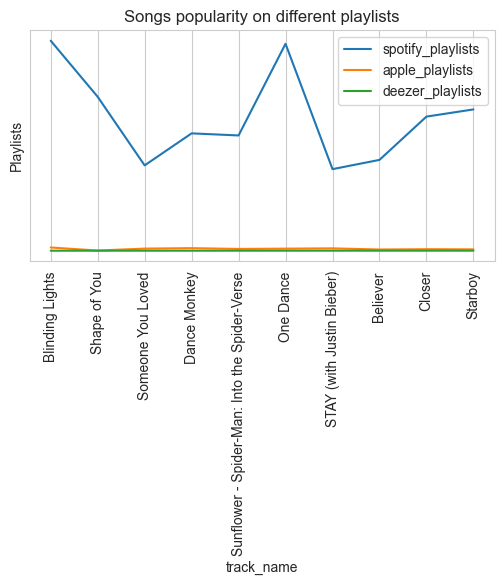

In [64]:
# Compare songs popularity accross different music platform

top_10.head(2)
mp.figure(figsize = (6,3))
mp.plot(top_10["track_name"],top_10["in_spotify_playlists"], label = "spotify_playlists")
mp.plot(top_10["track_name"], top_10["in_apple_playlists"], label = "apple_playlists")
mp.plot(top_10["track_name"], top_10["in_deezer_playlists"], label = "deezer_playlists")
mp.xticks(rotation= 90)
mp.legend()
mp.yticks([])
mp.xlabel("track_name")
mp.ylabel("Playlists")
mp.title("Songs popularity on different playlists")
mp.show()